In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df_stck=pd.read_feather("data/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [113]:
first_code_boot_disrn=[]

for i in range(5000):
    first_code_boot_disrn.append(
        np.mean(
            (df_stck.sample(frac=1,replace=True)
            ["age_first_code_cut"]== "child").mean()
        )
    )

In [114]:
prop_child_samp=(df_stck["age_first_code_cut"]== "child").mean()
prop_child_samp

0.39141972578505085

In [115]:
prop_child_hyp=0.35

In [116]:
std_err=np.std(first_code_boot_disrn,ddof=1)
std_err

0.010482551689042623

In [117]:
z_score=(prop_child_samp-prop_child_hyp)/std_err
z_score

3.951301840786226

In [118]:
from scipy.stats import norm
1-norm.cdf(z_score,loc=0,scale=1)

3.886360832394686e-05

In [119]:
from scipy.stats import norm

alpha = 0.05
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean()
prop_child_hyp = 0.35

std_err = np.std(first_code_boot_disrn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_err


p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

3.886360832394686e-05

In [120]:
lower = np.quantile(first_code_boot_disrn, 0.025)
upper = np.quantile(first_code_boot_disrn, 0.975)
(lower,upper)

(0.37063246351172047, 0.4113334807607252)

In [121]:
df_stck.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [124]:
xbar = df_stck.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [125]:
s = df_stck.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [126]:
n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [127]:
df_stck.groupby('age_first_code_cut')['converted_comp'].agg(['mean','std','count'])

,mean,std,count
age_first_code_cut,,,
adult,111313.311047,271546.521729,1376
child,132419.570621,255585.240115,885


In [128]:
pay = xbar.iloc[1] - xbar.iloc[0]
payda = np.sqrt(s.iloc[1]**2 / n.iloc[1] + s.iloc[0]**2 / n.iloc[0])
t_stat = pay/payda
t_stat

1.8699313316221844

Text(0, 0.5, 'PDF(x)')

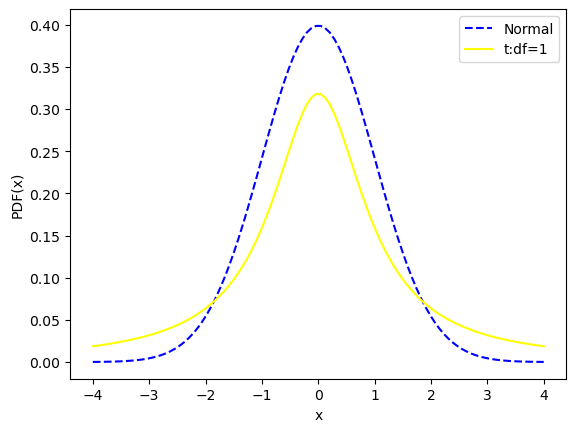

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--', color='blue')
plt.plot(x, stats.t.pdf(x, 1), label='t:df=1', color='yellow')
plt.legend()
plt.xlabel('x')
plt.ylabel('PDF(x)')

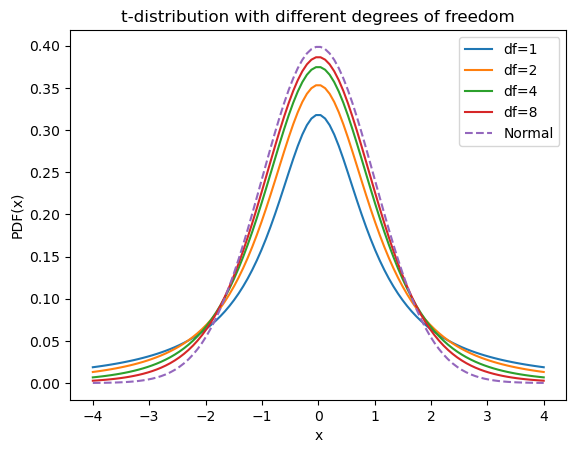

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)

# Plot for different degrees of freedom
for df in [1, 2, 4, 8]:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

plt.plot(x, stats.norm.pdf(x), label='Normal', 
         linestyle='--')
plt.legend()
plt.title('t-distribution with different degrees of freedom')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()

In [147]:
degrees_of_freedom = n.iloc[0] + n.iloc[1] - 2
degrees_of_freedom 

2259

In [149]:
from scipy.stats import t 

1 - t.cdf(t_stat, df=degrees_of_freedom)

0.030811302165157595

In [151]:
import pandas as pd 

df_election = pd.read_feather('data/repub_votes_potus_08_12.feather')

df_election

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


In [155]:
sample_data = df_election.copy()
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


(array([ 1.,  1.,  3., 12., 29., 28., 21.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-16.73039829, -14.08019672, -11.42999514,  -8.77979356,
         -6.12959198,  -3.4793904 ,  -0.82918882,   1.82101276,
          4.47121434,   7.12141592,   9.7716175 ,  12.42181908,
         15.07202066,  17.72222224,  20.37242382,  23.0226254 ,
         25.67282698,  28.32302856,  30.97323013,  33.62343171,
         36.27363329]),
 <BarContainer object of 20 artists>)

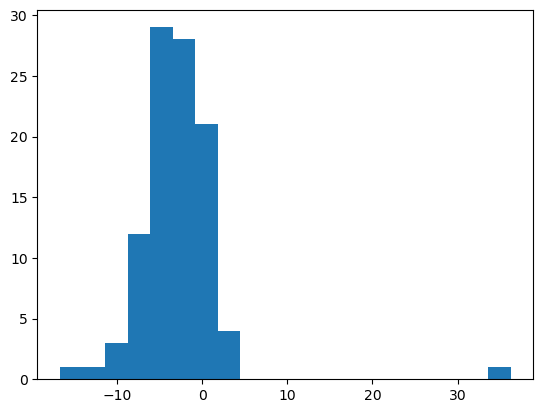

In [157]:
import matplotlib.pyplot as plt

plt.hist(sample_data['diff'],bins=20)

In [159]:
x_bar_diff = sample_data['diff'].mean()
x_bar_diff

-2.877109041242944

In [165]:
import numpy as np

n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
t_stat = (x_bar_diff - 0)/np.sqrt(s_diff**2/n_diff)

t_stat

-5.601043121928489

In [167]:
from scipy.stats import t

degrees_of_freedom = n_diff - 1
p_value = t.cdf(t_stat, df=degrees_of_freedom)
p_value

9.572537285272411e-08